In [103]:
import os
from collections import defaultdict
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
path = "./Predictions_3_files/"
mpl.axes.titlesize=14
mpl.axes.labelsize=14

In [104]:
overAllDict = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)
            
            for stuff in lines[1:]:


                for thing in stuff:
                    thingie = thing.split("\t") # split by tabs to get columns
                    if len(keys) != len(thingie):
                        print(sentID,thingie)
                    else:
                        _List = [int(thingie[0])]
                        _List.append(int(thingie[-4]))
                        _List.append(thingie[-3])
                        _List.append(int(thingie[-2]))
                        _List.append(thingie[-1])
                    
                        sentDicts.append(_List)
                        
                sentID += 1
            overAllDict[item][filName.split(".")[0]] = sentDicts

./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/poetry.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/L2S/Test.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/yap/prose.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/poetry.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
301 ['']
./Predictions_3_files/yap/Test.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
1001 ['']
./Predictions_3_files/DCST/poetry_final.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head

In [105]:
#precision
depDisttDictUnLab = defaultdict(dict)
depDisttDictLab = defaultdict(dict)
for item in overAllDict:
    for thing in overAllDict[item]:
        for stuff in overAllDict[item][thing]:
            #print(item+"_"+thing, stuff[1], stuff[3], stuff[1]-stuff[3])
            if stuff[1] == stuff[3]:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                if stuff[2] == stuff[4]:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(1) 
                else:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                    
            else:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

                try:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)
                except KeyError:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])] = list()
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[3])].append(0)

In [106]:
[np.arange(0,1.1,0.1)]

[array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])]

<Figure size 432x288 with 0 Axes>

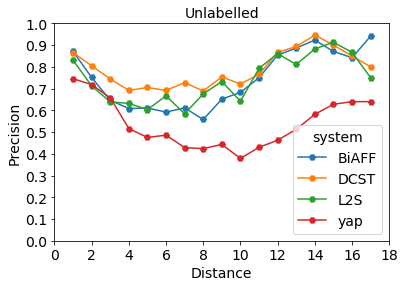

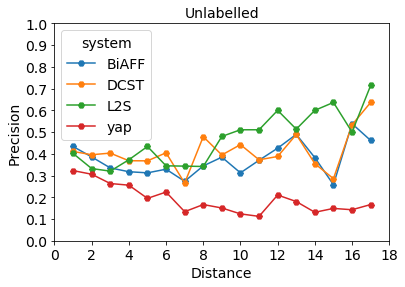

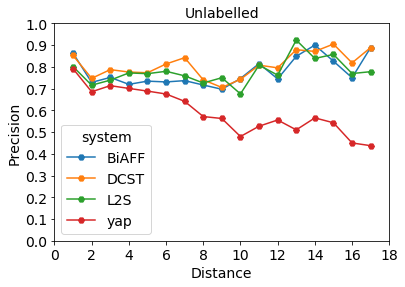

In [107]:
def plotter(item,cutoff,labOrNot="Unlabelled",evaln="Precision"): 
    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= cutoff)  ][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
    ax = plotPD.plot(marker='H',title=labOrNot,xticks=(range(0,len(plotPD.index)+2,2)),yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel(evaln,fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+".eps",dpi=600,bbox_inches="tight")
    
    

resList = list()
for item in depDisttDictUnLab:
    for stuff in depDisttDictUnLab[item]:
        thing = depDisttDictUnLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
item =  distPD["setting"].unique()
plotter('prose',17)
plotter('poetry',17)
plotter('Test',17)

In [108]:
plotPD = distPD[(distPD["setting"] == "prose") & (distPD["Distance"] <= 17)  ][["system","Distance","fscore"]]
plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
plotPD

system,BiAFF,DCST,L2S,yap
Distance,,,,
1,0.870787,0.865585,0.831073,0.745293
2,0.751286,0.804795,0.712014,0.718605
3,0.646199,0.744409,0.638806,0.657459
4,0.608108,0.691542,0.631841,0.516129
5,0.610778,0.705128,0.603659,0.475248
6,0.591837,0.691729,0.666667,0.485981
7,0.611650,0.727273,0.584158,0.428571
8,0.557895,0.689189,0.675676,0.423913
9,0.651685,0.753425,0.732394,0.443299


<Figure size 432x288 with 0 Axes>

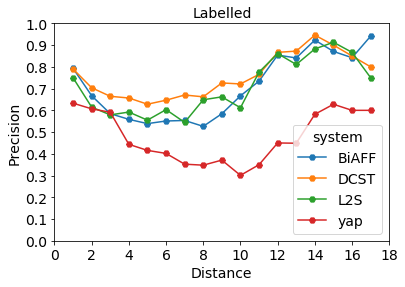

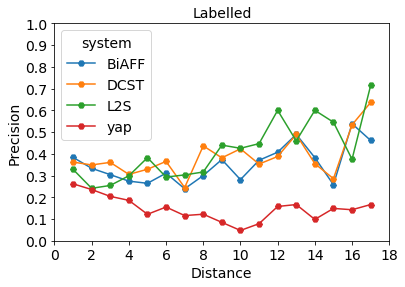

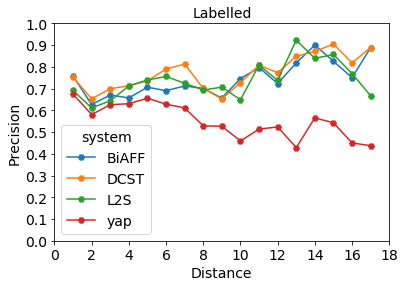

In [109]:
resList = list()
for item in depDisttDictLab:
    for stuff in depDisttDictLab[item]:
        thing = depDisttDictLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
item =  distPD["setting"].unique()
plotter('prose',17,labOrNot="Labelled")
plotter('poetry',17,labOrNot="Labelled")
plotter('Test',17,labOrNot="Labelled")

In [110]:
#recall
depDisttDictUnLab = defaultdict(dict)
depDisttDictLab = defaultdict(dict)
for item in overAllDict:
    for thing in overAllDict[item]:
        for stuff in overAllDict[item][thing]:
            #print(item+"_"+thing, stuff[1], stuff[3], stuff[1]-stuff[3])
            if stuff[1] == stuff[3]:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                if stuff[2] == stuff[4]:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(1) 
                else:
                    try:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                    except KeyError:
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                        depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                    
            else:
                try:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                except KeyError:
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictUnLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)

                try:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)
                except KeyError:
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])] = list()
                    depDisttDictLab[item+"_"+thing][abs(stuff[0]-stuff[1])].append(0)

<Figure size 432x288 with 0 Axes>

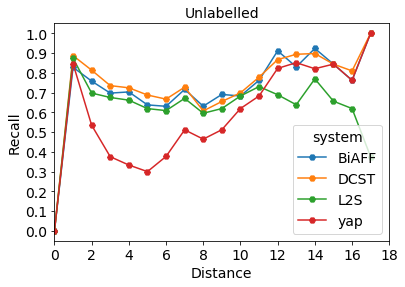

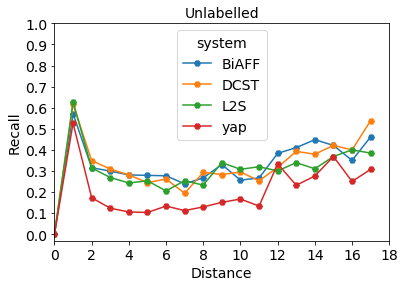

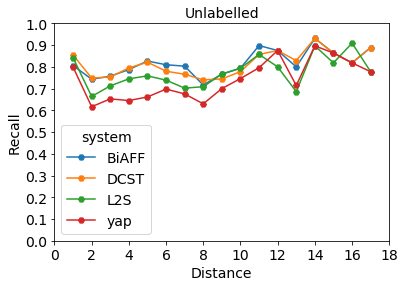

In [111]:
resList = list()
for item in depDisttDictUnLab:
    for stuff in depDisttDictUnLab[item]:
        thing = depDisttDictUnLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()

item =  distPD["setting"].unique()
plotter('prose',17,evaln="Recall")
plotter('poetry',17,evaln="Recall")
plotter('Test',17,evaln="Recall")

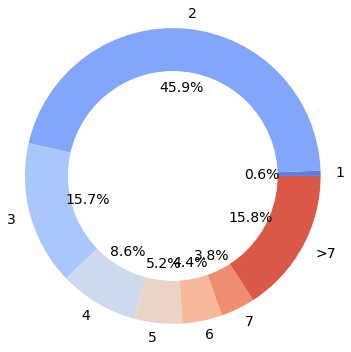

In [112]:
plotPD = distPD[(distPD["setting"] == "prose") & (distPD["Distance"] <= 17)  ][["system","Distance","lenth"]]
plotPD = plotPD.pivot(index="Distance",columns="system",values="lenth").fillna(0)
a = list(plotPD["BiAFF"][:7])
a.append(int(plotPD["BiAFF"][7:].sum()))

b = list(range(1,8))
b.append(">7")

from palettable.colorbrewer.qualitative import Pastel1_7, Paired_11
import seaborn as sns
plt.rcParams.update({'font.size': 14})
my_circle=plt.Circle( (0,0), 1.2, color='white')
ax = plt.pie(a, labels=b, colors=sns.color_palette("coolwarm", 8), autopct="%1.1f%%",radius=1.7)

p=plt.gcf()
p.gca().add_artist(my_circle)
#plt.show()
plt.savefig("depLenPoetry.eps",dpi=600,bbox_inches="tight")

<Figure size 432x288 with 0 Axes>

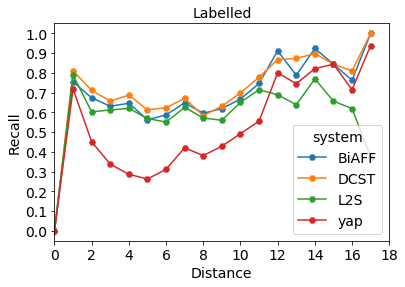

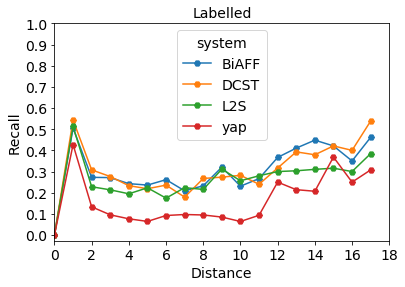

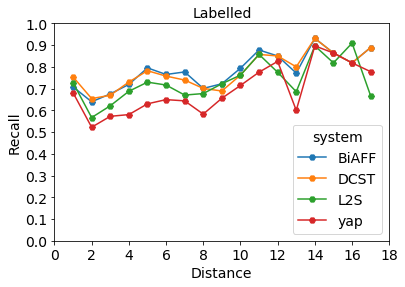

In [113]:
resList = list()
for item in depDisttDictLab:
    for stuff in depDisttDictLab[item]:
        thing = depDisttDictLab[item][stuff]
        resList.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

distPD = pd.DataFrame.from_records(resList,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()

item =  distPD["setting"].unique()
plotter('prose',17,labOrNot="Labelled",evaln="Recall")
plotter('poetry',17,labOrNot="Labelled",evaln="Recall")
plotter('Test',17,labOrNot="Labelled",evaln="Recall")

In [114]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            rootDist = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                tempSent = [thing.split("\t") for thing in stuff]

                for thing in tempSent:
                    try:
                        _path = [int(thing[0])]
                        startNode = int(thing[0])
                        termNode = int(thing[0])
                        
                    except ValueError:
                        print(thing[0],thing)
                        
   
                    while termNode != 0:
                        try:
                            if termNode == int(tempSent[termNode - 1][-4]):
                                _path = list()
                                break
        
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break

                        if len(tempSent) < len(_path):
                            print(len(tempSent), len(_path), _path, tempSent[0])
                            _path = list()
                            break
                        try:
                            termNode = int(tempSent[termNode - 1][-4])
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break
                            
                        
                        
                        
                        _path.append(termNode)
                    if thing[-4] == thing[-2]:
                        _path.append(True)
                        if thing[-3] == thing[-1]:
                            _path.append(True)
                        else:
                            _path.append(False)

                    else:
                        _path.append(False)
                        _path.append(False)

                    rootDist.append(_path)
            rootDef[item][filName.split(".")[0]] = rootDist            


./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
11 12 [1, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [2, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [3, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [4, 5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [5, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [6, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axikaranam']
11 12 [7, 9, 10, 11, 9, 10, 11, 9, 10, 11, 9, 10] ['1', 'asmin', 'loc. sg. m.', 'idam', '9', 'axikaranam', '9', 'axi

11 12 [5, 7, 9, 10, 5, 7, 9, 10, 5, 7, 9, 10] ['1', 'asO', 'adas', 'nom. sg. m.', 'nom. sg. m.', 'case=nom|gender=m|nos=sg', '11', 'karwa', '11', 'karwa']
11 12 [7, 9, 10, 5, 7, 9, 10, 5, 7, 9, 10, 5] ['1', 'asO', 'adas', 'nom. sg. m.', 'nom. sg. m.', 'case=nom|gender=m|nos=sg', '11', 'karwa', '11', 'karwa']
11 12 [8, 9, 10, 5, 7, 9, 10, 5, 7, 9, 10, 5] ['1', 'asO', 'adas', 'nom. sg. m.', 'nom. sg. m.', 'case=nom|gender=m|nos=sg', '11', 'karwa', '11', 'karwa']
11 12 [9, 10, 5, 7, 9, 10, 5, 7, 9, 10, 5, 7] ['1', 'asO', 'adas', 'nom. sg. m.', 'nom. sg. m.', 'case=nom|gender=m|nos=sg', '11', 'karwa', '11', 'karwa']
11 12 [10, 5, 7, 9, 10, 5, 7, 9, 10, 5, 7, 9] ['1', 'asO', 'adas', 'nom. sg. m.', 'nom. sg. m.', 'case=nom|gender=m|nos=sg', '11', 'karwa', '11', 'karwa']
13 14 [1, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11, 12, 13, 11] ['1', 'ambumucaH', 'ambu-muc', 'nom. pl. m.', 'nom. pl. m.', 'case=nom|gender=m|nos=pl', '11', 'karwa', '13', 'karwa']
13 14 [2, 4, 11, 12, 13, 11, 12, 13, 11, 12,

13 14 [1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [2, 9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [3, 9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [5, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [6, 4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [7, 4, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [8, 9, 13, 1, 12, 13, 1, 12, 13, 1, 12, 13, 1, 12] ['1', 'iti', 'ind.', 'iti', '12', 'anuyogi', '13', 'sambanxah']
13 14 [9, 13, 1, 12, 13, 1, 1

13 14 [5, 6, 7, 4, 6, 7, 4, 6, 7, 4, 6, 7, 4, 6] ['1', 'saMvftEH', 'i. pl. n.', 'saMvfta', '2', 'viseranam', '4', 'viseranam']
13 14 [6, 7, 4, 6, 7, 4, 6, 7, 4, 6, 7, 4, 6, 7] ['1', 'saMvftEH', 'i. pl. n.', 'saMvfta', '2', 'viseranam', '4', 'viseranam']
13 14 [7, 4, 6, 7, 4, 6, 7, 4, 6, 7, 4, 6, 7, 4] ['1', 'saMvftEH', 'i. pl. n.', 'saMvfta', '2', 'viseranam', '4', 'viseranam']
14 13 9 [1, 2, 3, 4, 6, 8, 9, 12, 14] ['1', 'atiunnatatvAt', 'abl. sg. n.', 'ati-unnatatva', '2', 'hewuh', '3', 'hewuh']
14 13 8 [2, 3, 4, 6, 8, 9, 12, 14] ['1', 'atiunnatatvAt', 'abl. sg. n.', 'ati-unnatatva', '2', 'hewuh', '3', 'hewuh']
14 13 7 [3, 4, 6, 8, 9, 12, 14] ['1', 'atiunnatatvAt', 'abl. sg. n.', 'ati-unnatatva', '2', 'hewuh', '3', 'hewuh']
14 13 6 [4, 6, 8, 9, 12, 14] ['1', 'atiunnatatvAt', 'abl. sg. n.', 'ati-unnatatva', '2', 'hewuh', '3', 'hewuh']
14 13 6 [5, 6, 8, 9, 12, 14] ['1', 'atiunnatatvAt', 'abl. sg. n.', 'ati-unnatatva', '2', 'hewuh', '3', 'hewuh']
14 13 5 [6, 8, 9, 12, 14] ['1', 'atiunnat

In [115]:
rootDef

defaultdict(dict,
            {'L2S': {'prose': [[1, 13, 0, True, True],
               [2, 11, 12, 13, 0, False, False],
               [3, 4, 13, 0, True, True],
               [4, 13, 0, False, False],
               [5, 6, 7, 8, 9, 11, 12, 13, 0, True, True],
               [6, 7, 8, 9, 11, 12, 13, 0, True, True],
               [7, 8, 9, 11, 12, 13, 0, False, False],
               [8, 9, 11, 12, 13, 0, True, True],
               [9, 11, 12, 13, 0, False, False],
               [10, 11, 12, 13, 0, False, False],
               [11, 12, 13, 0, False, False],
               [12, 13, 0, True, True],
               [13, 0, True, True],
               [1, 11, 0, False, False],
               [2, 5, 7, 11, 0, False, False],
               [3, 5, 7, 11, 0, False, False],
               [4, 5, 7, 11, 0, True, True],
               [5, 7, 11, 0, False, False],
               [6, 5, 7, 11, 0, False, False],
               [7, 11, 0, True, True],
               [8, 9, 11, 0, True, True],
  

In [116]:
totListUnLab = defaultdict(dict)
totListLab = defaultdict(dict)
for item in rootDef:
    for stuff in rootDef[item]:
        countr = 0
        for thing in rootDef[item][stuff]:
            if len(thing) >= 3:
                if thing[-2] == True:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                if thing[-1] == True:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                
                
            else:
                countr +=1
        print(item,stuff,countr, len(rootDef[item][stuff]))

L2S prose 150 3706
L2S poetry 144 3706
L2S Test 0 6895
yap prose 150 3706
yap poetry 144 3706
yap Test 0 6895
DCST poetry_final 144 3706
DCST prose_final 150 3706
DCST Test 0 6895
BiAFF poetry_final 144 3706
BiAFF prose_final 150 3706
BiAFF Test 0 6895


In [117]:
unDF = list()
for item in totListUnLab:
    for stuff in totListUnLab[item]:
        thing = totListUnLab[item][stuff]
        unDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

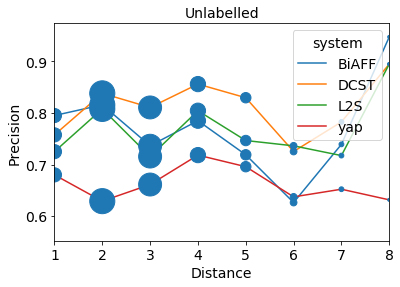

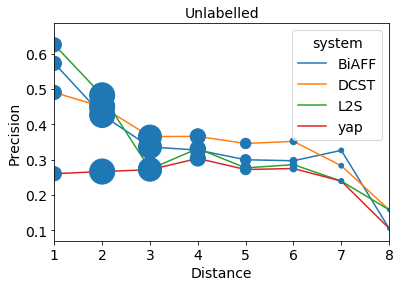

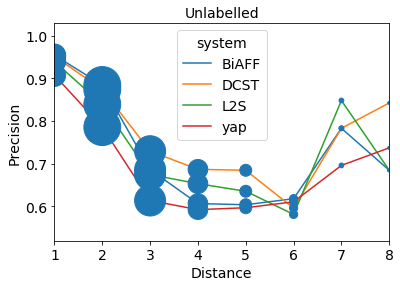

In [124]:
distPD = pd.DataFrame.from_records(unDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
labOrNot = "Unlabelled"
evaln = "Precision"
for item in distPD["setting"].unique():

    plotPD2 = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= 8)][["system","Distance","fscore","lenth"]]
    plotPD = plotPD2.pivot(index="Distance",columns="system",values="fscore")

    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='',title=labOrNot,yticks = np.arange(0,1.1,0.1),zorder=1)
    plt.scatter(plotPD2.Distance, plotPD2.fscore, s=plotPD2.lenth/2, zorder=2)
    ax.title.set_size(14)
    ax.set_ylabel("Precision",fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+"DistRoot.eps",dpi=600,bbox_inches="tight")


In [59]:
for item in distPD["setting"].unique():
    print(item)
    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= 8)][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    print(plotPD)



prose
system       BiAFF      DCST       L2S       yap
Distance                                        
1         0.795000  0.757500  0.725000  0.680000
2         0.815727  0.837967  0.807784  0.629071
3         0.736441  0.810657  0.715509  0.661275
4         0.784946  0.855914  0.804301  0.718280
5         0.718894  0.829493  0.746544  0.695853
6         0.626374  0.725275  0.736264  0.637363
7         0.739130  0.782609  0.717391  0.652174
8         0.947368  0.894737  0.894737  0.631579
poetry
system       BiAFF      DCST       L2S       yap
Distance                                        
1         0.572500  0.490000  0.625000  0.260000
2         0.426307  0.449287  0.481775  0.266244
3         0.335863  0.365275  0.273245  0.271347
4         0.326882  0.365591  0.331183  0.303226
5         0.299539  0.345622  0.276498  0.271889
6         0.296703  0.351648  0.285714  0.274725
7         0.326087  0.282609  0.239130  0.239130
8         0.105263  0.157895  0.157895  0.105263
Test
sy

In [16]:
labDF = list()
for item in totListLab:
    for stuff in totListLab[item]:
        thing = totListLab[item][stuff]
        labDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])

<Figure size 432x288 with 0 Axes>

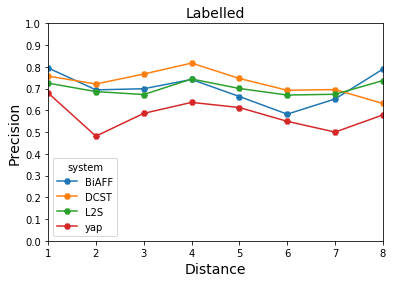

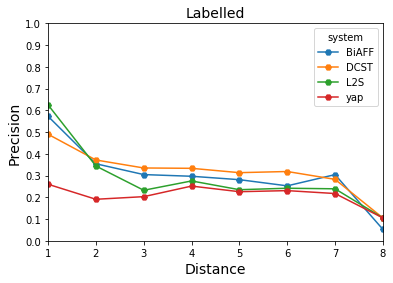

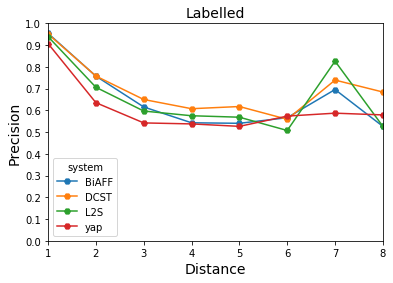

In [17]:
distPD = pd.DataFrame.from_records(labDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()

labOrNot = "Labelled"
evaln = "Precision"
for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= 8)][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='H',title=labOrNot,yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel("Precision",fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+"DistRoot.eps",dpi=600,bbox_inches="tight")


In [18]:
plotPD = distPD[distPD["setting"] == item][["system","Distance","lenth"]]
plotPD = plotPD.pivot(index="Distance",columns="system",values="lenth")
plotPD

system,BiAFF,DCST,L2S,yap
Distance,,,,
1,1000,1000,1000,1000
2,2711,2711,2711,2711
3,1922,1922,1922,1922
4,772,772,772,772
5,285,285,285,285
6,136,136,136,136
7,46,46,46,46
8,19,19,19,19
9,3,3,3,3


In [19]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            sentDicts = list()
            rootDist = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                tempSent = [thing.split("\t") for thing in stuff]

                for thing in tempSent:
                    try:
                        _path = [int(thing[0])]
                        startNode = int(thing[0])
                        termNode = int(thing[0])
                        
                    except ValueError:
                        print(thing[0],thing)
                        
   
                    while termNode != 0:
                        try:
                            if termNode == int(tempSent[termNode - 1][-2]):
                                _path = list()
                                break
        
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break

                        if len(tempSent) < len(_path):
                            print(len(tempSent), len(_path), _path, tempSent[0])
                            _path = list()
                            break
                        try:
                            termNode = int(tempSent[termNode - 1][-2])
                        except IndexError:
                            print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                            _path = list()
                            break
                            
                        
                        
                        
                        _path.append(termNode)
                    if thing[-4] == thing[-2]:
                        _path.append(True)
                        if thing[-3] == thing[-1]:
                            _path.append(True)
                        else:
                            _path.append(False)

                    else:
                        _path.append(False)
                        _path.append(False)

                    rootDist.append(_path)
            rootDef[item][filName.split(".")[0]] = rootDist            


./Predictions_3_files/L2S/prose.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/L2S/poetry.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/L2S/Test.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/prose.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/poetry.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/yap/Test.conll
['word_id', 'word', 'lemma', 'postag', 'postag', 'feature', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Predictions_3_files/DCST/poetry_final.conll
['word_id', 'word', 'postag', 'lemma', 'gold_head', 'gold_label', 'pred_head', 'pred_label']
./Prediction

In [20]:
totListUnLab = defaultdict(dict)
totListLab = defaultdict(dict)
for item in rootDef:
    for stuff in rootDef[item]:
        countr = 0
        for thing in rootDef[item][stuff]:
            if len(thing) >= 3:
                if thing[-2] == True:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListUnLab[item+"_"+stuff][len(thing)-3] = list()
                        totListUnLab[item+"_"+stuff][len(thing)-3].append(0)
                if thing[-1] == True:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(1)
                else:
                    try:
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                    except KeyError:
                        totListLab[item+"_"+stuff][len(thing)-3] = list()
                        totListLab[item+"_"+stuff][len(thing)-3].append(0)
                
                
            else:
                countr +=1
        print(item,stuff,countr, len(rootDef[item][stuff]))

L2S prose 0 3706
L2S poetry 0 3706
L2S Test 0 6895
yap prose 0 3706
yap poetry 0 3706
yap Test 0 6895
DCST poetry_final 0 3706
DCST prose_final 0 3706
DCST Test 0 6895
BiAFF poetry_final 0 3706
BiAFF prose_final 0 3706
BiAFF Test 0 6895


<Figure size 432x288 with 0 Axes>

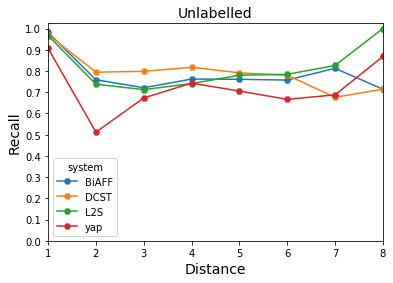

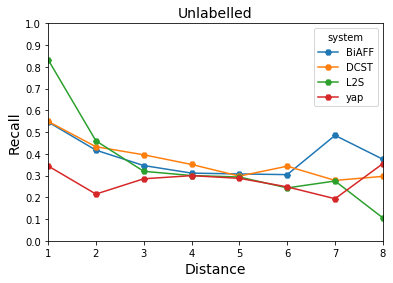

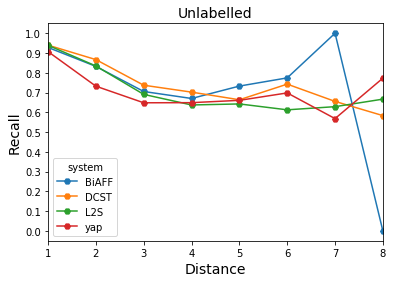

In [21]:
unDF = list()
for item in totListUnLab:
    for stuff in totListUnLab[item]:
        thing = totListUnLab[item][stuff]
        unDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])
distPD = pd.DataFrame.from_records(unDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
labOrNot = "Unlabelled"
evaln = "Recall"

for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= 8)][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='H',title=labOrNot,yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel(evaln,fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+"DistRoot.eps",dpi=600,bbox_inches="tight")


In [133]:
item = "Test"
plotPD = distPD[distPD["setting"] == item][["system","Distance","fscore"]]
plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore").fillna(0)
plotPD

system,BiAFF,DCST,L2S,yap
Distance,,,,
1,0.954000,0.951000,0.939000,0.907000
2,0.884176,0.873847,0.838805,0.785319
3,0.685744,0.728928,0.674298,0.613424
4,0.606218,0.686528,0.652850,0.591969
5,0.603509,0.684211,0.635088,0.596491
6,0.617647,0.595588,0.580882,0.610294
7,0.782609,0.782609,0.847826,0.695652
8,0.684211,0.842105,0.684211,0.736842
9,0.666667,1.000000,1.000000,0.666667


<Figure size 432x288 with 0 Axes>

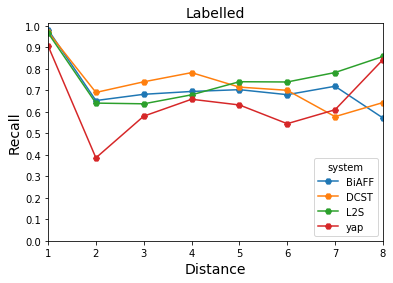

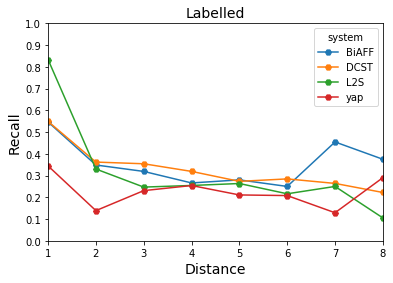

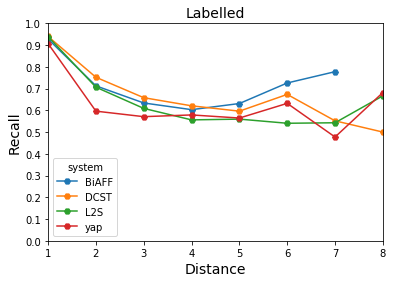

In [23]:
labDF = list()
for item in totListLab:
    for stuff in totListLab[item]:
        thing = totListLab[item][stuff]
        labDF.append([item.split("_")[0],item.split("_")[1],stuff,len(thing),sum(thing),sum(thing)/len(thing)])
distPD = pd.DataFrame.from_records(labDF,columns=["system","setting","Distance","lenth","summ","fscore"])
plt.clf()
labOrNot = "Labelled"
evaln = "Recall"
for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) & (distPD["Distance"] <= 8)][["system","Distance","fscore"]]
    plotPD = plotPD.pivot(index="Distance",columns="system",values="fscore")
    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='H',title=labOrNot,yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel(evaln,fontsize=14)
    ax.set_xlabel(plotPD.index.name,fontsize=14)
    plt.savefig(item+labOrNot+evaln+"DistRoot.eps",dpi=600,bbox_inches="tight")


In [24]:
        for (parentIdx, childIdx) in arc_list:
            # Ensure that childIdx < parentIdx
            if childIdx > parentIdx:
                temp = childIdx
                childIdx = parentIdx
                parentIdx = temp
            for k in range(childIdx + 1, parentIdx):
                for m in range(len(depgraph.nodes)):
                    if (m < childIdx) or (m > parentIdx):
                        if (k, m) in arc_list:
                            return False
                        if (m, k) in arc_list:
                            return False
        return True

SyntaxError: 'return' outside function (<ipython-input-24-f69c2fcb818a>, line 11)

In [ ]:
def parents(tempSent):
    rootDist = dict()
    for thing in tempSent:
        try:
            _path = [int(thing[0])]
            startNode = int(thing[0])
            termNode = int(thing[0])

        except ValueError:
            print(thing[0],thing)


        while termNode != 0:
            try:
                if termNode == int(tempSent[termNode - 1][-2]):
                    _path = [int(tempSent[0][0])]
                    break

            except IndexError:
                print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break

            if len(tempSent) < len(_path):
                print(len(tempSent), len(_path), _path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break
            try:
                termNode = int(tempSent[termNode - 1][-2])
            except IndexError:
                print(termNode,len(tempSent), len(_path),_path, tempSent[0])
                _path = [int(tempSent[0][0])]
                break




            _path.append(termNode)
        if thing[-4] == thing[-2]:
            _path.append(True)
            if thing[-3] == thing[-1]:
                _path.append(True)
            else:
                _path.append(False)

        else:
            _path.append(False)
            _path.append(False)

        rootDist[_path[0]] = _path
        rootDist[0] = [0]
    return rootDist

In [ ]:
if 5 not in range(7,10):
    print("hello")
else:
    print("poda")

In [ ]:
rootDef = defaultdict(dict)
for item in os.listdir(path): 
    if os.path.isdir(path+item):
        for filName in os.listdir(path+item): # file
            rootDef[item][filName] = list()
            f = open(path+item+"/"+filName).read().split("\n\n")             #open the fil
            print(path+item+"/"+filName)
            lines = [stuff.split("\n") for stuff in f] #get all the lines
            sentID = 1

            keys = [stuff.split("\t") for stuff in lines[0]][0]
            print(keys)

            for stuff in lines[1:-1]:
                proj = 1
                tempSent = [thing.split("\t") for thing in stuff]
                rootDist = parents(tempSent)
                children = dict()

                arcs = list()
                arcRes = dict()
                for thing in tempSent:
                    temArc = (int(thing[0]),int(thing[-4]))
                    arcs.append(temArc)
                    if int(thing[-4]) == int(thing[-2]):
                        if  thing[-3] == thing[-1]:
                            arcRes[temArc] = (1,1)
                        else:
                            arcRes[temArc] = (1,0)
                    else:
                        arcRes[temArc] = (0,0)
                newArcs = list() 
                for arc in arcs:
                    try:
                        children[arc[1]].append(arc[0])
                    except KeyError:
                        children[arc[1]] = list()
                        children[arc[1]].append(arc[0])
                    
                    
                    if arc[0] > arc[1]:
                        newArcs.append((arc[1],arc[0],"rev"))
                    else:
                        newArcs.append((arc[0],arc[1],"str"))

                arcDeg = dict()
                for i,arc in enumerate(newArcs):
                    arcDeg[arc] = 0
                    for j in range(arc[0],arc[1]):
                        if j not in rootDist.keys():
                                continue
                        if arc[2] == "rev":
                            
                            
                            if arc[0] not in rootDist[j]:
                                try:
                                    for child in children[j]:
                                        if child not in range(arc[0],arc[1]):
                                            arcDeg[arc] += 1
                                except KeyError:
                                    continue
                        else:
                            if arc[1] not in rootDist[j]:
                                try:
                                    for child in children[j]:
                                        if child not in range(arc[0],arc[1]):
                                            arcDeg[arc] += 1
                                except KeyError:
                                    continue
                    try:
                        if arc[2] == "str":
                            rootDef[item][filName].append((arc[0],arc[1],arcDeg[arc],arcRes[arc[0:2]][0],arcRes[arc[:2]][1]))
                        else:
                            rootDef[item][filName].append((arc[1],arc[0],arcDeg[arc],arcRes[(arc[1],arc[0])][0],arcRes[(arc[1],arc[0])][1]))
                            
                    except KeyError:
                        print(arc[0:2])
                        pass

In [ ]:
rootDef

In [ ]:
resList  = list()
for item in rootDef:
    for stuff in rootDef[item]:
        for thing in rootDef[item][stuff]:
            temp = (item,stuff.replace("_final","").split(".")[0]) + thing
            resList.append(temp)
distPD = pd.DataFrame.from_records(resList,columns=["system","setting","source","child","deg","un","lab"])
distPD

In [ ]:
unDeg = distPD.groupby(["system","setting","deg"])["un"].agg(['sum','count']).reset_index()
unDeg["prec"] = unDeg["sum"]/unDeg["count"]
unDeg[unDeg["setting"]=="prose"]

In [ ]:
nonzero = 381 + 192 + 86 + 29 + 13 +12

zero = 2993
nonzero/(zero+nonzero)




In [ ]:
nonzero = 191+49+17+7
zero = 3442
nonzero/(zero+nonzero)

In [ ]:
distPD = unDeg

for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) & (distPD["deg"] <= 6)][["system","deg","prec"]]
    plotPD = plotPD.pivot(index="deg",columns="system",values="prec")
    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='H',title="Labelled",yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel("Precision",fontsize=14)
    ax.set_xlabel("Degree of non-projectivity",fontsize=14)
    plt.savefig(item+"UnlabelledPrecDeg.eps",dpi=600,bbox_inches="tight")


In [ ]:
labDeg = distPD.groupby(["system","setting","deg"])["lab"].agg(['sum','count']).reset_index()
labDeg["prec"] = labDeg["sum"]/labDeg["count"]
labDeg

In [ ]:
distPD = labDeg


for item in distPD["setting"].unique():

    plotPD = distPD[(distPD["setting"] == item) & (distPD["deg"] <= 6)][["system","deg","prec"]]
    plotPD = plotPD.pivot(index="deg",columns="system",values="prec")
    #plotPD.plot(marker='H',title=item.title())
    ax = plotPD.plot(marker='H',title="Labelled",yticks = np.arange(0,1.1,0.1))
    ax.title.set_size(14)
    ax.set_ylabel("Precision",fontsize=14)
    ax.set_xlabel("Degree of non-projectivity",fontsize=14)
    plt.savefig(item+"LabelledPrecDeg.eps",dpi=600,bbox_inches="tight")


In [ ]:
                    for j,byarc in enumerate(newArcs):
                        if i != j:
                            if byarc[0] < arc[0] and byarc[1] > arc[0] and byarc[1] < arc[1]:
                                proj = 0 
                                break
                            elif byarc[0] > arc[0] and byarc[0] < arc[1] and  byarc[1] > arc[1]:
                                proj = 0
                                break
                        
                        
                break
            break
    break
            